In [106]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [107]:
pwd = os.getcwd()
path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')

In [108]:
db = pd.read_csv(path)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [109]:
user_engagement_db = db.groupby('MSISDN/Number').agg({
    "Bearer Id": "count",
    "Dur. (ms)": "sum",
    "Total DL (Bytes)": "sum",
    "Total UL (Bytes)": "sum",
    "Social Media DL (Bytes)": "sum",
    "Social Media UL (Bytes)": "sum",
    "Email DL (Bytes)": "sum",
    "Email UL (Bytes)": "sum",
    "Google DL (Bytes)": "sum",
    "Google UL (Bytes)": "sum",
    "Netflix DL (Bytes)": "sum",
    "Netflix UL (Bytes)": "sum",
    "Youtube DL (Bytes)": "sum",
    "Youtube UL (Bytes)": "sum",
    "Gaming DL (Bytes)": "sum",
    "Gaming UL (Bytes)": "sum",
    "Other DL (Bytes)": "sum",
    "Other UL (Bytes)": "sum",
}).rename(columns={
    "Bearer Id": "Session Count"
})
user_engagement_db.head()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,837400.0,493962.0,3337123.0,1051882.0,10265105.0,16915876.0,14900201.0,6724347.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,2828821.0,478960.0,4197697.0,1137166.0,770569.0,10451194.0,5324251.0,7107972.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,2436500.0,768880.0,3343483.0,99643.0,16525919.0,2827981.0,2137272.0,19196298.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,2178618.0,106052.0,5937765.0,3740728.0,1157362.0,784730.0,4393123.0,2584198.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,2247808.0,1057661.0,13728668.0,4770948.0,24971647.0,24230077.0,10339971.0,31193031.0,1.308981e+09,5816727.0,777643713.0,27160771.0


In [110]:
# top 10 users per session frequency
user_engagement_db.sort_values('Session Count', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,199479238.0,129246502.0,164048706.0,210434341.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,179585986.0,181815060.0,199823443.0,194546775.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,193912238.0,163068369.0,237883033.0,215075736.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,196277206.0,203241873.0,119658146.0,138332942.0,6.609900e+09,115658741.0,6.182551e+09,134864910.0
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,146500839.0,188142430.0,194068298.0,202220900.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,161626462.0,147466697.0,158665235.0,158745337.0,6.863307e+09,107260559.0,6.665074e+09,133441436.0
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,167932406.0,146007082.0,141972692.0,173258618.0,4.623424e+09,102197663.0,4.837534e+09,103984990.0
3.360452e+10,12,5207990.0,5.096079e+09,391775856.0,18083725.0,392798.0,19397083.0,4457346.0,57706148.0,26108889.0,151330389.0,114043873.0,83169358.0,96517390.0,4.766393e+09,80270693.0,4.059958e+09,69984867.0
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,20515774.0,261431.0,21791296.0,3785669.0,56331853.0,26406867.0,167023809.0,151323737.0,174245981.0,128923126.0,6.170943e+09,97676681.0,3.988504e+09,113141379.0


In [111]:
# top 10 users per duration of session
user_engagement_db.sort_values('Dur. (ms)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,193912238.0,163068369.0,237883033.0,215075736.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,179585986.0,181815060.0,199823443.0,194546775.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,146500839.0,188142430.0,194068298.0,202220900.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,199479238.0,129246502.0,164048706.0,210434341.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,167932406.0,146007082.0,141972692.0,173258618.0,4.623424e+09,102197663.0,4.837534e+09,103984990.0
3.366284e+10,9,6614270.0,3.593674e+09,406424372.0,17103694.0,360240.0,13707750.0,4183849.0,48489232.0,15474271.0,110184890.0,74082924.0,120342889.0,142655957.0,3.283845e+09,67257928.0,3.893377e+09,102409203.0
3.366469e+10,9,6288730.0,5.279827e+09,402180804.0,16834010.0,351031.0,12978367.0,4601251.0,54588663.0,18994447.0,129706681.0,131857877.0,126220891.0,79146878.0,4.939498e+09,69322418.0,4.862951e+09,97906902.0
3.360313e+10,12,6287761.0,4.540607e+09,435587631.0,22776679.0,301146.0,20343728.0,5855167.0,73942055.0,12986961.0,156086546.0,104401875.0,158976704.0,125113435.0,4.108482e+09,82962892.0,6.222705e+09,103966155.0
3.366746e+10,6,5649882.0,2.334299e+09,266222647.0,7606997.0,177076.0,16987953.0,3050111.0,30111394.0,9322276.0,94654071.0,79389387.0,69628569.0,76010354.0,2.115310e+09,42848778.0,2.776996e+09,55424665.0


In [112]:
# add upload and download bytes to get the total
user_engagement_db["Total Data Transferred (Bytes)"] = user_engagement_db["Total UL (Bytes)"] + user_engagement_db["Total DL (Bytes)"]

In [113]:
# top 10 users per total data transferred
user_engagement_db.sort_values('Total Data Transferred (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,179585986.0,181815060.0,199823443.0,194546775.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0,8.846226e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,146500839.0,188142430.0,194068298.0,202220900.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0,8.514774e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,193912238.0,163068369.0,237883033.0,215075736.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0,8.499621e+09
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,199479238.0,129246502.0,164048706.0,210434341.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0,7.971167e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,161626462.0,147466697.0,158665235.0,158745337.0,6.863307e+09,107260559.0,6.665074e+09,133441436.0,7.891111e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,196277206.0,203241873.0,119658146.0,138332942.0,6.609900e+09,115658741.0,6.182551e+09,134864910.0,7.705863e+09
3.366646e+10,11,4536757.0,6.903440e+09,405060976.0,18234924.0,395062.0,19667181.0,5889958.0,62599213.0,26721524.0,115946985.0,98469941.0,140663858.0,86672154.0,6.546328e+09,99975537.0,4.262205e+09,86936800.0,7.308501e+09
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,20515774.0,261431.0,21791296.0,3785669.0,56331853.0,26406867.0,167023809.0,151323737.0,174245981.0,128923126.0,6.170943e+09,97676681.0,3.988504e+09,113141379.0,7.132371e+09
3.366471e+10,11,2927785.0,6.400774e+09,471244453.0,19035729.0,354870.0,15213560.0,6212447.0,64946017.0,25443355.0,134941569.0,116857240.0,153074482.0,123759531.0,6.013562e+09,90293610.0,3.868637e+09,108323400.0,6.872018e+09


<h4>Normalization<h4>

In [158]:
scaler = MinMaxScaler()
scaled_user_engagement_db = pd.DataFrame(scaler.fit_transform(user_engagement_db), index=user_engagement_db.index, columns=user_engagement_db.columns)

In [159]:
scaled_user_engagement_db

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,
3.360100e+10,0.000000,0.005908,0.102334,0.045666,0.051621,0.040623,0.024914,0.054798,0.028740,0.029150,0.051459,0.083230,0.062636,0.031265,0.106414,0.008834,0.046987,0.061948,0.095931
3.360100e+10,0.000000,0.009387,0.013737,0.045737,0.060793,0.098293,0.084170,0.053134,0.036152,0.031513,0.003863,0.051422,0.022382,0.033048,0.013780,0.095063,0.034833,0.014073,0.014026
3.360100e+10,0.000000,0.006892,0.067236,0.050144,0.073648,0.075473,0.072497,0.085297,0.028795,0.002761,0.082845,0.013914,0.008984,0.089253,0.069413,0.063048,0.061689,0.043203,0.063851
3.360101e+10,0.000000,0.002304,0.048254,0.024027,0.005883,0.045686,0.064823,0.011764,0.051139,0.103663,0.005802,0.003861,0.018467,0.012015,0.050915,0.019712,0.003146,0.065596,0.044148
3.360101e+10,0.058824,0.001615,0.166215,0.125791,0.066939,0.081326,0.066882,0.117334,0.118241,0.132213,0.125184,0.119218,0.043466,0.145032,0.171736,0.037578,0.096897,0.177601,0.161598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.083346,0.032818,0.005482,0.104388,0.014308,0.058349,0.058860,0.019318,0.073966,0.000727,0.034867,0.085335,0.086240,0.019605,0.036308,0.025445,0.077317
3.379000e+10,0.000000,0.007217,0.053480,0.045225,0.010345,0.089319,0.074786,0.000072,0.012680,0.109665,0.034740,0.007878,0.023528,0.066277,0.056103,0.060618,0.025498,0.042365,0.050727
3.197021e+12,0.000000,0.046922,0.022828,0.047377,0.015642,0.073902,0.025060,0.075270,0.073834,0.051707,0.051839,0.079961,0.041364,0.009857,0.021590,0.087119,0.058274,0.018624,0.022566


In [164]:
kmeans =KMeans(n_clusters=3)
clustered_data = kmeans.fit_predict(scaled_user_engagement_db)

In [169]:
clustered_data

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [166]:
kmeans.cluster_centers_

array([[0.06800828, 0.01100048, 0.11905447, 0.11823507, 0.09078133,
        0.11290652, 0.11456943, 0.11202802, 0.10685902, 0.12298219,
        0.12586195, 0.11715361, 0.10524728, 0.11027678, 0.1192056 ,
        0.11583029, 0.11323358, 0.11647514, 0.1173739 ],
       [0.00048102, 0.0052502 , 0.05486519, 0.05288111, 0.04224656,
        0.05236229, 0.05367477, 0.05205439, 0.0497824 , 0.05716991,
        0.05846091, 0.05430044, 0.04916781, 0.05146755, 0.0555119 ,
        0.05374287, 0.05279457, 0.05431327, 0.05263955],
       [0.1981545 , 0.03124946, 0.25010027, 0.24654972, 0.18392362,
        0.23033219, 0.23687055, 0.22956358, 0.21935007, 0.25387977,
        0.25961409, 0.23924646, 0.21772939, 0.22688677, 0.24950672,
        0.23669433, 0.23095457, 0.2393266 , 0.24911119]])

In [170]:
scaled_user_engagement_db['Clusters'] = kmeans.labels_

In [171]:
scaled_user_engagement_db

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Clusters
MSISDN/Number,,,,,,,,,,,,,,,,,,,,
3.360100e+10,0.000000,0.005908,0.102334,0.045666,0.051621,0.040623,0.024914,0.054798,0.028740,0.029150,0.051459,0.083230,0.062636,0.031265,0.106414,0.008834,0.046987,0.061948,0.095931,1
3.360100e+10,0.000000,0.009387,0.013737,0.045737,0.060793,0.098293,0.084170,0.053134,0.036152,0.031513,0.003863,0.051422,0.022382,0.033048,0.013780,0.095063,0.034833,0.014073,0.014026,1
3.360100e+10,0.000000,0.006892,0.067236,0.050144,0.073648,0.075473,0.072497,0.085297,0.028795,0.002761,0.082845,0.013914,0.008984,0.089253,0.069413,0.063048,0.061689,0.043203,0.063851,1
3.360101e+10,0.000000,0.002304,0.048254,0.024027,0.005883,0.045686,0.064823,0.011764,0.051139,0.103663,0.005802,0.003861,0.018467,0.012015,0.050915,0.019712,0.003146,0.065596,0.044148,1
3.360101e+10,0.058824,0.001615,0.166215,0.125791,0.066939,0.081326,0.066882,0.117334,0.118241,0.132213,0.125184,0.119218,0.043466,0.145032,0.171736,0.037578,0.096897,0.177601,0.161598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,0.000000,0.000090,0.083346,0.032818,0.005482,0.104388,0.014308,0.058349,0.058860,0.019318,0.073966,0.000727,0.034867,0.085335,0.086240,0.019605,0.036308,0.025445,0.077317,1
3.379000e+10,0.000000,0.007217,0.053480,0.045225,0.010345,0.089319,0.074786,0.000072,0.012680,0.109665,0.034740,0.007878,0.023528,0.066277,0.056103,0.060618,0.025498,0.042365,0.050727,1
3.197021e+12,0.000000,0.046922,0.022828,0.047377,0.015642,0.073902,0.025060,0.075270,0.073834,0.051707,0.051839,0.079961,0.041364,0.009857,0.021590,0.087119,0.058274,0.018624,0.022566,1


In [180]:
clustered_data

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

<AxesSubplot:xlabel='Other DL (Bytes)', ylabel='Total Data Transferred (Bytes)'>

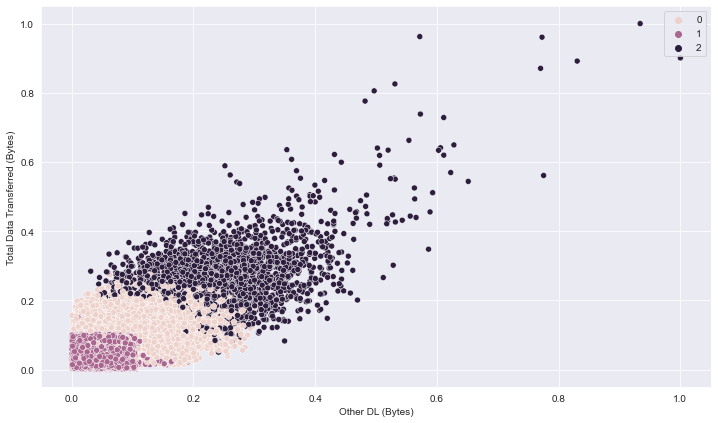

In [223]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(data=scaled_user_engagement_db, x="Other DL (Bytes)", y="Total Data Transferred (Bytes)", hue=kmeans.labels_, ax=ax)

In [190]:
scaled_user_engagement_db.sample(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Clusters
MSISDN/Number,,,,,,,,,,,,,,,,,,,,
3.366814e+10,0.000000,0.008811,0.088411,0.062756,0.001718,0.073305,0.081084,0.028215,0.062541,0.017164,0.069386,0.084119,0.025118,0.079277,0.091749,0.055753,0.075148,0.031223,0.084468,1
3.368926e+10,0.000000,0.002591,0.008040,0.060423,0.037243,0.030970,0.082952,0.033595,0.063270,0.017734,0.025670,0.068339,0.016592,0.095503,0.007024,0.001484,0.046419,0.072940,0.009969,1
3.366488e+10,0.000000,0.004400,0.066922,0.051488,0.068305,0.099751,0.064156,0.048676,0.039782,0.010329,0.077115,0.023893,0.050401,0.016376,0.067833,0.094963,0.067028,0.106793,0.063671,1
3.363538e+10,0.058824,0.011238,0.083888,0.114744,0.074346,0.153956,0.122283,0.112245,0.099632,0.100912,0.049638,0.138926,0.097998,0.047541,0.084002,0.142252,0.125173,0.137461,0.084573,0
3.361973e+10,0.000000,0.002215,0.073170,0.082981,0.025398,0.073401,0.031213,0.075979,0.056525,0.089398,0.018066,0.098345,0.029553,0.085583,0.076840,0.033334,0.100021,0.102388,0.072045,1
3.364579e+10,0.000000,0.005539,0.032511,0.052758,0.027009,0.075784,0.100511,0.022431,0.004518,0.013348,0.090871,0.066054,0.034192,0.057461,0.031803,0.030558,0.085336,0.065137,0.031962,1
3.376037e+10,0.000000,0.004274,0.024950,0.085457,0.064198,0.055820,0.073540,0.006432,0.085639,0.022952,0.065561,0.099834,0.052907,0.086911,0.022474,0.095409,0.104984,0.067326,0.027668,1
3.366799e+10,0.117647,0.012782,0.133357,0.131715,0.159500,0.119265,0.138634,0.143271,0.207089,0.167115,0.094560,0.156972,0.183612,0.151709,0.130850,0.064183,0.131562,0.109339,0.131709,0
3.367930e+10,0.000000,0.011936,0.078098,0.053396,0.005549,0.028896,0.084855,0.072610,0.000206,0.055198,0.004339,0.034773,0.042895,0.044519,0.082783,0.087575,0.027442,0.057591,0.074161,1


In [197]:
scaled_user_engagement_db.loc[scaled_user_engagement_db['Clusters'] == 0].describe()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Clusters
count,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.000000,24604.0
mean,0.067997,0.010999,0.119029,0.118220,0.090776,0.112883,0.114548,0.112023,0.106847,0.122977,0.125845,0.117140,0.105230,0.110269,0.119180,0.115811,0.113215,0.116453,0.117349,0.0
std,0.021473,0.007663,0.045887,0.028979,0.038032,0.047236,0.048689,0.047389,0.044861,0.051333,0.053158,0.049146,0.044837,0.046268,0.048592,0.048433,0.048204,0.049249,0.042932,0.0
min,0.000000,0.000378,0.006927,0.031692,0.000172,0.000751,0.000516,0.001122,0.001108,0.000915,0.000876,0.000560,0.000689,0.001009,0.001845,0.000626,0.000541,0.001096,0.013057,0.0
25%,0.058824,0.005828,0.086407,0.098247,0.063778,0.079752,0.080037,0.078430,0.075254,0.086705,0.088258,0.082795,0.073526,0.077492,0.084549,0.081895,0.078800,0.081393,0.086740,0.0
50%,0.058824,0.009337,0.117507,0.114877,0.089177,0.110998,0.111947,0.110182,0.104818,0.120703,0.123630,0.115622,0.103319,0.108614,0.117844,0.114254,0.111450,0.114423,0.115623,0.0
75%,0.058824,0.013929,0.150848,0.133982,0.116670,0.144776,0.147566,0.143516,0.137214,0.157430,0.161362,0.150068,0.135897,0.141737,0.152952,0.148604,0.146260,0.149843,0.146786,0.0
max,0.176471,0.170796,0.297716,0.255580,0.238780,0.307944,0.315571,0.300278,0.290592,0.328805,0.333583,0.318619,0.313702,0.292114,0.307572,0.309469,0.301192,0.315179,0.283675,0.0


In [198]:
scaled_user_engagement_db.loc[scaled_user_engagement_db['Clusters'] == 1].describe()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Clusters
count,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.000000,78018.0
mean,0.000479,0.005250,0.054865,0.052880,0.042246,0.052362,0.053674,0.052052,0.049781,0.057168,0.058459,0.054299,0.049166,0.051466,0.055512,0.053741,0.052793,0.054314,0.052639,1.0
std,0.005285,0.004070,0.029932,0.015734,0.024501,0.030394,0.031112,0.030233,0.028699,0.033204,0.033954,0.031417,0.028432,0.029687,0.031977,0.031099,0.030588,0.031343,0.027693,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.002585,0.029070,0.041907,0.021097,0.026101,0.026761,0.025954,0.025122,0.028418,0.029055,0.027072,0.024734,0.025850,0.027889,0.026680,0.026341,0.027299,0.028825,1.0
50%,0.000000,0.004273,0.055029,0.052788,0.042028,0.052170,0.053813,0.051740,0.049697,0.057077,0.058427,0.054227,0.049067,0.051492,0.055705,0.053770,0.052697,0.054343,0.052824,1.0
75%,0.000000,0.007108,0.080727,0.063831,0.063400,0.078477,0.080246,0.077938,0.074445,0.085825,0.087749,0.081308,0.073548,0.077202,0.083171,0.080442,0.079067,0.081117,0.076497,1.0
max,0.058824,0.084451,0.159312,0.138330,0.164236,0.201074,0.205971,0.190621,0.188752,0.223314,0.228242,0.187573,0.184566,0.195817,0.167819,0.206808,0.196022,0.212781,0.151563,1.0


In [199]:
scaled_user_engagement_db.loc[scaled_user_engagement_db['Clusters'] == 2].describe()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Clusters
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.0
mean,0.198050,0.031234,0.250043,0.246455,0.183820,0.230295,0.236817,0.229441,0.219268,0.253736,0.259525,0.239159,0.217680,0.226768,0.249452,0.236643,0.230909,0.239251,0.249051,2.0
std,0.070403,0.036660,0.085470,0.071444,0.070038,0.085785,0.090226,0.086835,0.082671,0.093452,0.095822,0.089377,0.081643,0.084771,0.088090,0.087423,0.085750,0.088214,0.082648,0.0
min,0.117647,0.002143,0.036349,0.112233,0.021371,0.017813,0.029358,0.024457,0.017042,0.019503,0.030596,0.018415,0.023939,0.020997,0.025256,0.033471,0.031356,0.020365,0.050079,2.0
25%,0.176471,0.018203,0.196582,0.201485,0.137530,0.174254,0.177506,0.171621,0.164916,0.191898,0.196085,0.180632,0.163370,0.172160,0.193802,0.180277,0.174624,0.182395,0.197660,2.0
50%,0.176471,0.022613,0.240085,0.233539,0.176813,0.220675,0.227591,0.220434,0.211881,0.243202,0.251415,0.229684,0.208454,0.219268,0.239967,0.226358,0.223440,0.230864,0.238564,2.0
75%,0.235294,0.029362,0.291335,0.273442,0.221757,0.273401,0.281706,0.275276,0.261623,0.302916,0.308472,0.283704,0.258566,0.270943,0.293566,0.280558,0.276383,0.284445,0.287888,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [200]:
user_engagement_db["Total Data Transferred (Bytes)"] = user_engagement_db["Total UL (Bytes)"] + user_engagement_db["Total DL (Bytes)"]
user_engagement_db["Google Volume (Bytes)"] = user_engagement_db["Google UL (Bytes)"] + user_engagement_db["Google DL (Bytes)"]
user_engagement_db["Netflix Volume (Bytes)"] = user_engagement_db["Netflix UL (Bytes)"] + user_engagement_db["Netflix DL (Bytes)"]
user_engagement_db["Youtube Volume (Bytes)"] = user_engagement_db["Youtube UL (Bytes)"] + user_engagement_db["Youtube DL (Bytes)"]
user_engagement_db["Gaming Volume (Bytes)"] = user_engagement_db["Gaming UL (Bytes)"] + user_engagement_db["Gaming DL (Bytes)"]
user_engagement_db["Email Volume (Bytes)"] = user_engagement_db["Email UL (Bytes)"] + user_engagement_db["Email DL (Bytes)"]
user_engagement_db["Social Media Volume (Bytes)"] = user_engagement_db["Social Media UL (Bytes)"] + user_engagement_db["Social Media DL (Bytes)"]
user_engagement_db["Other Volume (Bytes)"] = user_engagement_db["Other UL (Bytes)"] + user_engagement_db["Other DL (Bytes)"]

In [201]:
user_engagement_db.head()

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,837400.0,493962.0,3337123.0,1051882.0,...,377096990.0,9473882.0,8.786906e+08,4389005.0,27180981.0,21624548.0,8.124587e+08,1331362.0,2232135.0,386570872.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,2828821.0,478960.0,4197697.0,1137166.0,...,279557701.0,2152370.0,1.568596e+08,5334863.0,11221763.0,12432223.0,1.197501e+08,3307781.0,2660565.0,281710071.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,2436500.0,768880.0,3343483.0,99643.0,...,495086501.0,6607171.0,5.959665e+08,3443126.0,19353900.0,21333570.0,5.388277e+08,3205380.0,3195623.0,501693672.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,2178618.0,106052.0,5937765.0,3740728.0,...,25248001.0,10031701.0,4.223207e+08,9678493.0,1942092.0,6977321.0,3.911261e+08,2284670.0,280294.0,35279702.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,2247808.0,1057661.0,13728668.0,4770948.0,...,777643713.0,27160771.0,1.457411e+09,18499616.0,49201724.0,41533002.0,1.314798e+09,3305469.0,2912542.0,804804484.0


In [204]:
user_engagement_db.sort_values('Social Media Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,...,4.590038e+09,126096213.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,...,6.182551e+09,134864910.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,...,4.837534e+09,103984990.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09
3.378632e+10,12,4059652.0,5.155901e+09,466330265.0,23568655.0,406264.0,30876908.0,5433215.0,78819810.0,31434674.0,...,4.172594e+09,79892668.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09
3.366907e+10,11,610801.0,3.477886e+09,428655875.0,23477047.0,323787.0,17813584.0,5109829.0,54915216.0,22909468.0,...,4.540939e+09,64429870.0,3.906542e+09,77824684.0,212009030.0,236402804.0,3.269152e+09,22923413.0,23800834.0,4.605369e+09
3.360313e+10,12,6287761.0,4.540607e+09,435587631.0,22776679.0,301146.0,20343728.0,5855167.0,73942055.0,12986961.0,...,6.222705e+09,103966155.0,4.976195e+09,86929016.0,260488421.0,284090139.0,4.191445e+09,26198895.0,23077825.0,6.326671e+09


In [205]:
user_engagement_db.sort_values('Google Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,...,4.590038e+09,126096213.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,...,6.182551e+09,134864910.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
3.378632e+10,12,4059652.0,5.155901e+09,466330265.0,23568655.0,406264.0,30876908.0,5433215.0,78819810.0,31434674.0,...,4.172594e+09,79892668.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,...,6.665074e+09,133441436.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,...,4.837534e+09,103984990.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09
3.376127e+10,10,3481629.0,4.554647e+09,496467102.0,14201427.0,294653.0,15768841.0,4984880.0,72949803.0,24140185.0,...,4.997985e+09,79794752.0,5.051114e+09,97089988.0,292091341.0,272789592.0,4.274099e+09,20753721.0,14496080.0,5.077779e+09


In [206]:
user_engagement_db.sort_values('Email Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.378632e+10,12,4059652.0,5.155901e+09,466330265.0,23568655.0,406264.0,30876908.0,5433215.0,78819810.0,31434674.0,...,4.172594e+09,79892668.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,...,6.182551e+09,134864910.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,...,4.590038e+09,126096213.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,...,6.665074e+09,133441436.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
3.366546e+10,9,2566292.0,5.042243e+09,346387218.0,10331363.0,223480.0,25942871.0,4475014.0,43984050.0,19613376.0,...,2.900205e+09,73247588.0,5.388631e+09,63597426.0,197517914.0,232292532.0,4.781003e+09,30417885.0,10554843.0,2.973452e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,...,4.837534e+09,103984990.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09


In [207]:
user_engagement_db.sort_values('Youtube Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,...,4.590038e+09,126096213.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,...,6.665074e+09,133441436.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,...,4.837534e+09,103984990.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09
3.362708e+10,12,4703516.0,5.309479e+09,445251947.0,17438671.0,370240.0,17353955.0,6213264.0,62722401.0,24403520.0,...,5.039747e+09,78044196.0,5.754731e+09,87125921.0,267040897.0,308790774.0,4.972353e+09,23567219.0,17808911.0,5.117791e+09
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,20515774.0,261431.0,21791296.0,3785669.0,56331853.0,26406867.0,...,3.988504e+09,113141379.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09
3.369879e+10,11,5169128.0,6.010556e+09,530343105.0,15390784.0,337377.0,24165599.0,4893443.0,59943992.0,19792133.0,...,4.598153e+09,91723291.0,6.540899e+09,79736125.0,268247480.0,302661958.0,5.753743e+09,29059042.0,15728161.0,4.689876e+09


In [208]:
user_engagement_db.sort_values('Netflix Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,...,6.182551e+09,134864910.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,...,4.590038e+09,126096213.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,20515774.0,261431.0,21791296.0,3785669.0,56331853.0,26406867.0,...,3.988504e+09,113141379.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09
3.366716e+10,13,8744914.0,5.052068e+09,566326364.0,23753753.0,494097.0,23276752.0,7059044.0,71707826.0,33324870.0,...,4.837534e+09,103984990.0,5.618394e+09,105032696.0,313939488.0,315231310.0,4.725622e+09,30335796.0,24247850.0,4.941519e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,...,6.665074e+09,133441436.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
3.378632e+10,12,4059652.0,5.155901e+09,466330265.0,23568655.0,406264.0,30876908.0,5433215.0,78819810.0,31434674.0,...,4.172594e+09,79892668.0,5.622232e+09,110254484.0,305939790.0,214763912.0,4.851096e+09,36310123.0,23974919.0,4.252487e+09


In [209]:
user_engagement_db.sort_values('Gaming Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.376054e+10,15,9279434.0,7.811295e+09,703478581.0,39297646.0,485543.0,26437895.0,7255872.0,88626532.0,34596567.0,...,4.590038e+09,126096213.0,8.514774e+09,123223099.0,334643269.0,396289198.0,7.461045e+09,33693767.0,39783189.0,4.716134e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,...,6.665074e+09,133441436.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,...,6.182551e+09,134864910.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
3.366646e+10,11,4536757.0,6.903440e+09,405060976.0,18234924.0,395062.0,19667181.0,5889958.0,62599213.0,26721524.0,...,4.262205e+09,86936800.0,7.308501e+09,89320737.0,214416926.0,227336012.0,6.646303e+09,25557139.0,18629986.0,4.349141e+09
3.376041e+10,12,5321667.0,6.610852e+09,521518890.0,20515774.0,261431.0,21791296.0,3785669.0,56331853.0,26406867.0,...,3.988504e+09,113141379.0,7.132371e+09,82738720.0,318347546.0,303169107.0,6.268620e+09,25576965.0,20777205.0,4.101645e+09
3.366471e+10,11,2927785.0,6.400774e+09,471244453.0,19035729.0,354870.0,15213560.0,6212447.0,64946017.0,25443355.0,...,3.868637e+09,108323400.0,6.872018e+09,90389372.0,251798809.0,276834013.0,6.103856e+09,21426007.0,19390599.0,3.976960e+09


In [210]:
user_engagement_db.sort_values('Other Volume (Bytes)', ascending=False).head(10)

,Session Count,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Email DL (Bytes),Email UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total Data Transferred (Bytes),Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.362632e+10,18,8791927.0,7.301517e+09,669650721.0,42743837.0,630942.0,33404785.0,9013997.0,116106455.0,36085397.0,...,8.025477e+09,142400945.0,7.971167e+09,152191852.0,328725740.0,374483047.0,6.887572e+09,42418782.0,43374779.0,8.167878e+09
3.361489e+10,17,9966898.0,8.156743e+09,689483001.0,27749744.0,544800.0,33607211.0,7181423.0,93941708.0,34032079.0,...,7.495298e+09,143966031.0,8.846226e+09,127973787.0,361401046.0,394370218.0,7.749432e+09,40788634.0,28294544.0,7.639264e+09
3.367588e+10,15,4865947.0,7.309542e+09,581568792.0,18655364.0,567557.0,24284723.0,7229698.0,83002994.0,26857508.0,...,6.665074e+09,133441436.0,7.891111e+09,109860502.0,309093159.0,317410572.0,6.970568e+09,31514421.0,19222921.0,6.798515e+09
3.362578e+10,17,18553754.0,7.770043e+09,729577380.0,26564121.0,571379.0,31895412.0,8738554.0,107904739.0,34403176.0,...,6.201653e+09,152930478.0,8.499621e+09,142307915.0,356980607.0,452958769.0,7.326673e+09,40633966.0,27135500.0,6.354583e+09
3.360313e+10,12,6287761.0,4.540607e+09,435587631.0,22776679.0,301146.0,20343728.0,5855167.0,73942055.0,12986961.0,...,6.222705e+09,103966155.0,4.976195e+09,86929016.0,260488421.0,284090139.0,4.191445e+09,26198895.0,23077825.0,6.326671e+09
3.365973e+10,16,4035428.0,7.081602e+09,624260321.0,34900444.0,511914.0,29907647.0,6092145.0,90958549.0,25557796.0,...,6.182551e+09,134864910.0,7.705863e+09,116516345.0,399519079.0,257991088.0,6.725559e+09,35999792.0,35412358.0,6.317415e+09
3.362695e+10,10,2415036.0,4.390142e+09,435495985.0,16589934.0,332068.0,12978989.0,4503799.0,57627757.0,12360190.0,...,5.228772e+09,76675805.0,4.825638e+09,69987947.0,262722069.0,200085240.0,4.181763e+09,17482788.0,16922002.0,5.305448e+09
3.362708e+10,12,4703516.0,5.309479e+09,445251947.0,17438671.0,370240.0,17353955.0,6213264.0,62722401.0,24403520.0,...,5.039747e+09,78044196.0,5.754731e+09,87125921.0,267040897.0,308790774.0,4.972353e+09,23567219.0,17808911.0,5.117791e+09
3.376127e+10,10,3481629.0,4.554647e+09,496467102.0,14201427.0,294653.0,15768841.0,4984880.0,72949803.0,24140185.0,...,4.997985e+09,79794752.0,5.051114e+09,97089988.0,292091341.0,272789592.0,4.274099e+09,20753721.0,14496080.0,5.077779e+09


In [215]:
sum_of_application_usage = user_engagement_db[['Social Media Volume (Bytes)', 'Google Volume (Bytes)', 'Email Volume (Bytes)', 'Youtube Volume (Bytes)', 'Netflix Volume (Bytes)', 'Gaming Volume (Bytes)', 'Other Volume (Bytes)']].sum()

<AxesSubplot:>

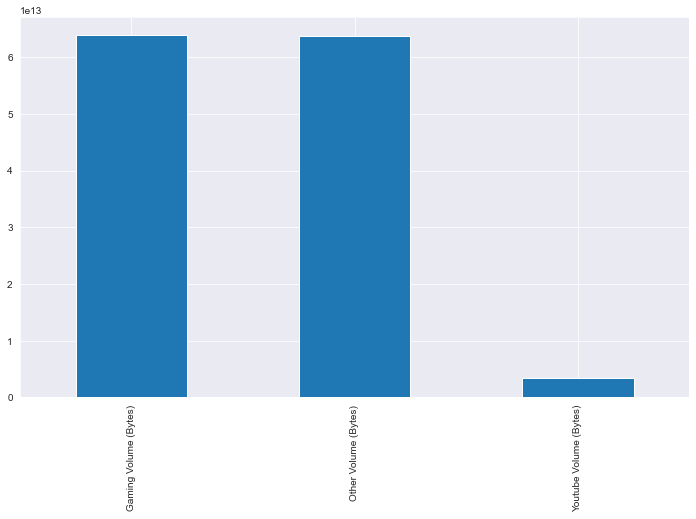

In [220]:
sum_of_application_usage.nlargest(3).plot.bar(figsize=(12, 7))